# 🚀 Predict Failure in Simulated Battery Dataset 

In [101]:
# Import libraries and packages
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🔍 Exploratory Data Analysis

In [97]:
# Import data csv
failure_results = pd.read_csv(r"C:\Users\khate\failure_prediction_data.csv")

failure_results.describe() # Use describe to understand data
failure_results.info() # there is no non=null value



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  10000 non-null  float64
 1   Pressure     10000 non-null  float64
 2   Cycle_Count  10000 non-null  int64  
 3   Voltage      10000 non-null  float64
 4   Failed       10000 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 390.8 KB


## Data Dictionary

| Feature        | Description                         | Unit              |
|----------------|-------------------------------------|-------------------|
| `Temperature`  | Operating temperature               | °C (Celsius)      |
| `Pressure`     | Internal or chamber pressure        | kPa               |
| `Cycle_Count`  | Number of charge/discharge cycles   | Count (unitless)  |
| `Voltage`      | Voltage of the battery              | V (Volts)         |
| `Failed`       | Failure status (0 = No, 1 = Yes)    | Binary (0 or 1)   |


In [98]:
# Observe first 5 rows
failure_results.head(5)

,Temperature,Pressure,Cycle_Count,Voltage,Failed
0,30.845859,99.887691,150,3.877767,0
1,29.392474,94.620400,116,3.765083,0
2,35.783126,114.005832,122,3.893541,1
3,31.000429,90.735204,232,3.653531,0
4,34.323053,84.790650,408,3.688259,0


# 📊 Data Visualization 

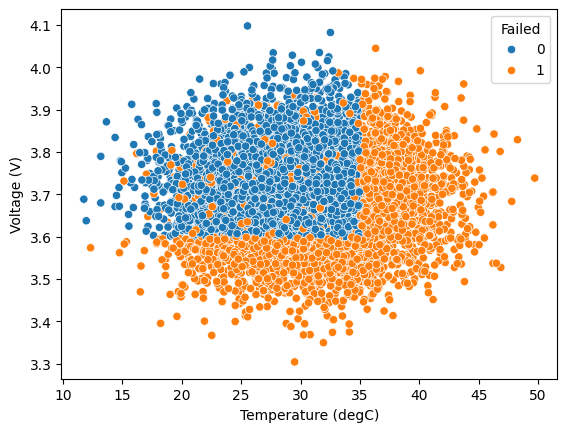

In [99]:
sns.scatterplot(x=failure_results['Temperature'], y=failure_results['Voltage'], hue=failure_results['Failed'])
plt.xlabel("Temperature (degC)")
plt.ylabel("Voltage (V)")
plt.show()


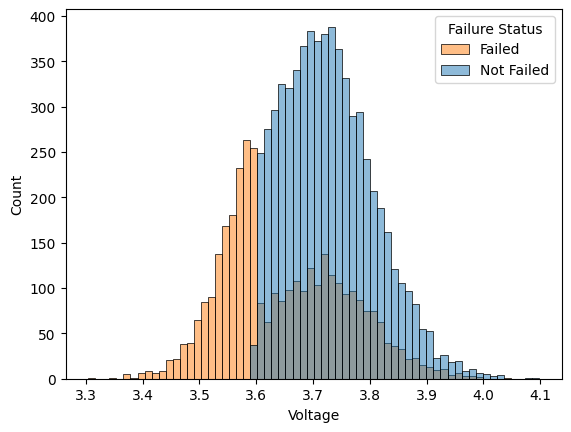

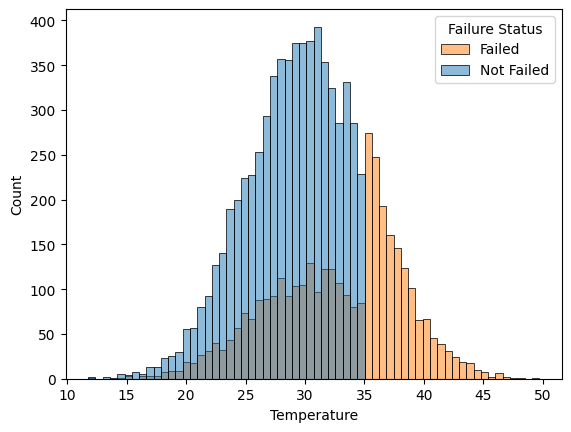

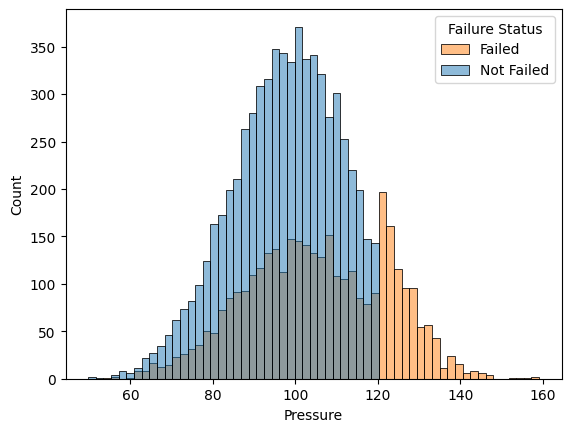

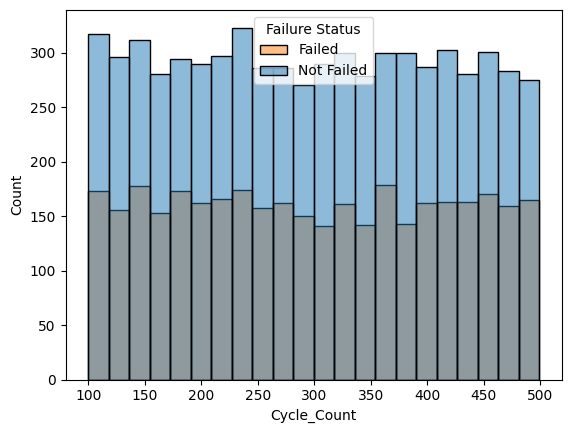

In [100]:
columns = failure_results[['Voltage', 'Temperature', 'Pressure', 'Cycle_Count']]
for i in columns:
    sns.histplot(x=columns[i], hue=failure_results['Failed'])
    plt.legend(title = "Failure Status", labels = ["Failed", "Not Failed"])
    plt.show()

# Test and Train Set

In [4]:
# Define x and y for train,test set
x = failure_results.drop(columns='Failed')
y = failure_results['Failed']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123, stratify=y)

# 🧠 Logistic Regression Model

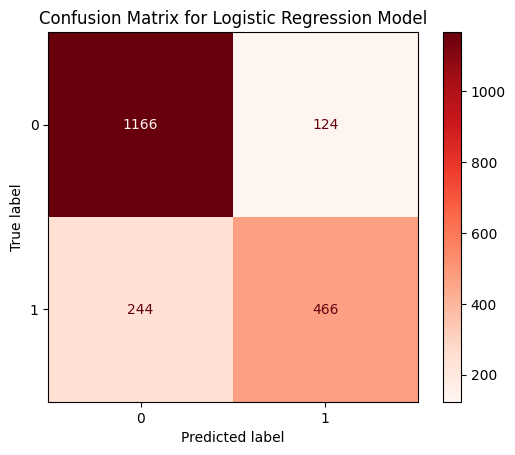

In [127]:
# Fit & Predict via Logostic Regression quick way
model = LogisticRegression()

model.fit(x_train, y_train)

y_predict = model.predict(x_test)

cm = confusion_matrix(y_test, y_predict)

display = ConfusionMatrixDisplay(cm)
display.plot(cmap="Reds")
plt.title("Confusion Matrix for Logistic Regression Model")
plt.show()


In [29]:
# Identify accuracy of the model as is 
print(classification_report(y_test, y_predict))

accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy: .2f}")



              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1290
           1       0.79      0.66      0.72       710

    accuracy                           0.82      2000
   macro avg       0.81      0.78      0.79      2000
weighted avg       0.81      0.82      0.81      2000

Accuracy:  0.82


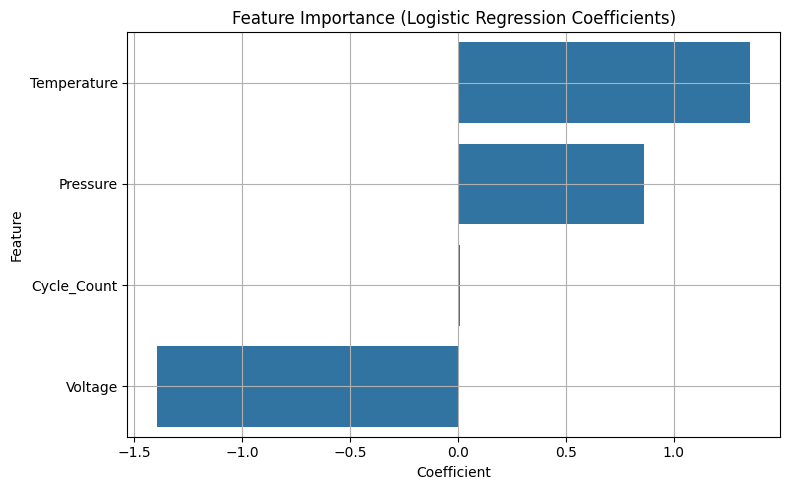

In [118]:
model = regression_model.named_steps['classifier']
features = x_train.columns
coefficients = model.coef_[0]

# Plot
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.barplot(x=coefficients, y=features)
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.grid(True)
plt.tight_layout()
plt.show()


# Conclusions for Logistic Regression

Temperature (High Importance): Positive coefficient →
⬆️ Higher Temperature → ⬆️ Higher likelihood of failure

Voltage (High Importance): Negative coefficient →
⬆️ Higher Voltage → ⬇️ Lower likelihood of failure 

Pressure (Moderate Importance): Positive coefficient →
⬆️ Higher Pressure → ⬆️ Higher likelihood of failure (but less than Temperature)


Cycle_Count: Coefficient is very close to zero →
➖ Little or no effect on failure in this model

# 🧠 Decision Tree Model

In [133]:
# Import Decision Tree Model

decision_tree_model = DecisionTreeClassifier()

decision_tree_model.fit(x_train, y_train) # Fit x,y_train

y_predict_dt_model = decision_tree_model.predict(x_test) # Predict y_train


In [134]:
# Print classfication report
print(classification_report(y_test, y_predict_dt_model))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1290
           1       1.00      1.00      1.00       710

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



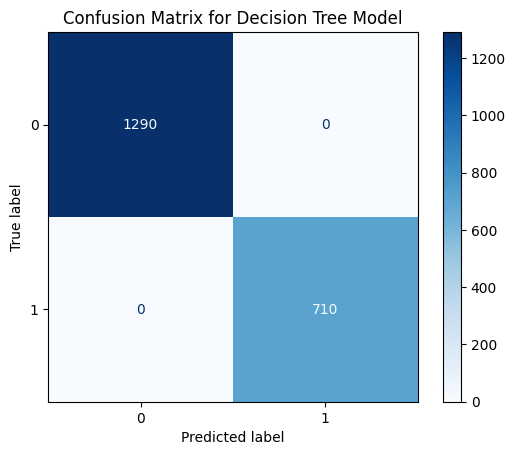

In [135]:
# Display Confusion Matrix 
cm_2 = confusion_matrix(y_test, y_predict_dt_model)
display = ConfusionMatrixDisplay(cm_2)

display.plot(cmap="Blues")
plt.title("Confusion Matrix for Decision Tree Model")
plt.show()


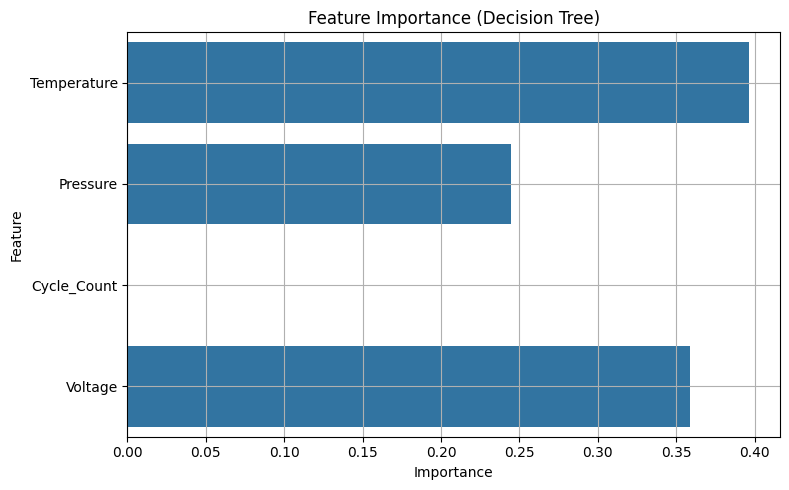

In [136]:
features = x_train.columns
importances = decision_tree_model.feature_importances_

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(True)
plt.tight_layout()
plt.show()


## Conclusions for Desicion Tree Model:

✅ The Decision Tree classifier achieved perfect classification performance on the test dataset, with 100% accuracy, precision, recall, and F1-score for both failure and non-failure classes.


⚠️ Small but important note:
Given that the data is synthetic and clean, this perfect performance is understandable. But in real-world scenarios, performance may vary due to:

+ Noise

+ Overlapping class boundaries

+ Missing or inconsistent data

Therefore, when dealing with real data, such perfect results may be a red flag: overfitting or data leakage.